<a href="https://colab.research.google.com/github/somewhereovertherainbo/TRANSFORMERS/blob/main/USING_TRANSFORMERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv.   #---> For sentiment classification

--2024-01-31 07:30:27--  https://lazyprogrammer.me/course_files/AirlineTweets.csv.
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lazyprogrammer.me/course_files/AirlineTweets.csv [following]
--2024-01-31 07:30:29--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Reusing existing connection to lazyprogrammer.me:443.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv.’

AirlineTweets.csv.  100%[===================>]   3.26M  4.64MB/s    in 0.7s    

2024-01-31 07:30:31 (4.64 MB/s) - ‘AirlineTweets.csv.’ saved [3421431/3421431]



In [4]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt  #---> For Text generation

--2024-01-31 07:30:31--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56286 (55K) [text/plain]
Saving to: ‘robert_frost.txt’

robert_frost.txt    100%[===================>]  54.97K  --.-KB/s    in 0.04s   

2024-01-31 07:30:31 (1.28 MB/s) - ‘robert_frost.txt’ saved [56286/56286]



In [5]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-01-31 07:30:31--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  5.56MB/s    in 0.9s    

2024-01-31 07:30:33 (5.56 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



# SENTIMENT CLASSIFICATION USING TRANSFORMERS LIBRARY

In [6]:
from transformers import pipeline

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
classifier = pipeline('sentiment-analysis', device = device)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [9]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [10]:
classifier(['This is all very boring to me','What is your name?'])

[{'label': 'NEGATIVE', 'score': 0.9997884631156921},
 {'label': 'NEGATIVE', 'score': 0.979487955570221}]

In [11]:
classifier('What is your name?')

[{'label': 'NEGATIVE', 'score': 0.979487955570221}]

In [12]:
df_ = pd.read_csv('AirlineTweets.csv.')

In [13]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [14]:
df = df_[['airline_sentiment','text']].copy()

In [15]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [16]:
len(df)

14640

<Axes: >

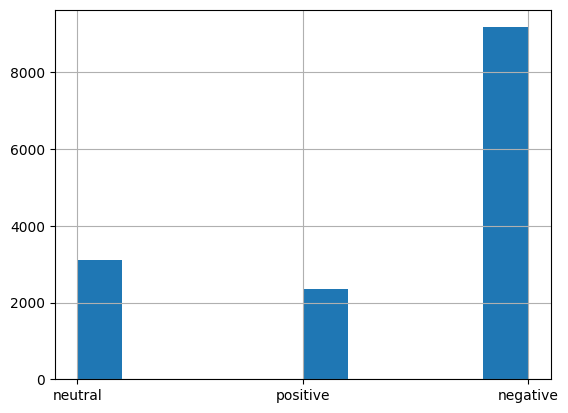

In [17]:
df['airline_sentiment'].hist()

There is class imbalance, so need to be careful with the metrics

In [18]:
df = df[df.airline_sentiment!='neutral'].copy()

In [19]:
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [20]:
target_map = {'positive':1, 'negative':0}

df['target'] = df['airline_sentiment'].map(target_map)

In [21]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [22]:
texts = df['text'].tolist()
texts[:10]

["@VirginAmerica plus you've added commercials to the experience... tacky.",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
 "@virginamerica Well, I didn't…but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
 '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D',
 "@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p",
 "@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlX

In [23]:
from timeit import default_timer

In [24]:
start_time = default_timer()
predictions = classifier(texts)
end_time = default_timer()
print(f'Time taken: {end_time-start_time}')

Time taken: 90.46315143999999


In [25]:
predictions[:10]

[{'label': 'POSITIVE', 'score': 0.6070840954780579},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553212523460388},
 {'label': 'POSITIVE', 'score': 0.9827088117599487},
 {'label': 'POSITIVE', 'score': 0.9994851350784302},
 {'label': 'POSITIVE', 'score': 0.9993509650230408},
 {'label': 'POSITIVE', 'score': 0.9940821528434753},
 {'label': 'POSITIVE', 'score': 0.9863133430480957}]

Making all the probabilities only for a single calss

In [26]:
preds = [1 if f['label'].startswith('P') else 0 for f in predictions]

In [27]:
accuracy = np.mean(preds == df['target'])

In [28]:
accuracy

0.8898708950697514

In [29]:
cm = confusion_matrix(y_true = df['target'], y_pred = preds, normalize = 'true')

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
cm

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

In [32]:
cm_image = ConfusionMatrixDisplay(cm, display_labels = ['positive', 'negative'])

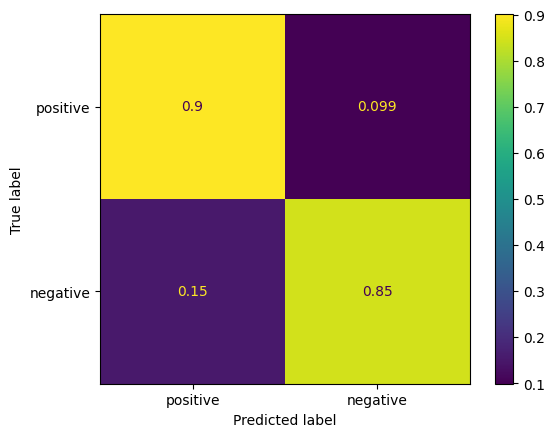

In [33]:
cm_image.plot()

<Axes: >

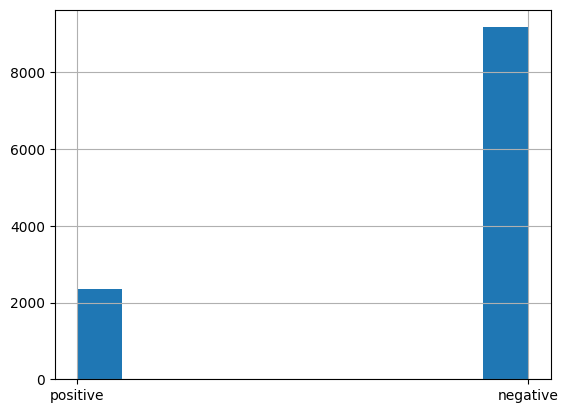

In [34]:
df['airline_sentiment'].hist()

In [35]:
f1_score(df['target'], preds)

0.7587777566900741

In [36]:
probs = [f['score'] if f['label'].startswith('P') else 1-f['score'] for f in predictions]

In [37]:
roc_auc_score(df['target'], probs)

0.9485934690648773

# TEXT GENERATION USING TRANSFORMERS LIBRARY

In [38]:
from transformers import pipeline

gen = pipeline('text-generation', device = device)

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [39]:
prompt = 'Yesterday, I was playing cricket'

In [40]:
gen(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Yesterday, I was playing cricket with friends of mine for a few months. As time went on as an individual player, I felt I needed to make a conscious effort to keep this world competitive, and to keep learning (to make myself a better bats'}]

This is not a question and answering machine. It continues our prompt in a meaningful way.

In [41]:
gen(prompt, num_return_sequences = 3, max_length = 9)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Yesterday, I was playing cricket for the first'},
 {'generated_text': 'Yesterday, I was playing cricket with my friend'},
 {'generated_text': 'Yesterday, I was playing cricket in New York'}]

In [42]:
import textwrap
from pprint import pprint

In [43]:
# !cat robert_frost.txt

In [44]:
lines = [line.rstrip() for line in open('robert_frost.txt','r',encoding="utf-8")] #Getting rid of spaces between lines
print(len(lines))
lines = [line for line in lines if len(line)>0]
print(len(lines))

1581
1436


In [45]:
lines[0]

'Two roads diverged in a yellow wood,'

In [46]:
gen(lines[0])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Two roads diverged in a yellow wood, with the left-winger's group still on the highway crossing at 11.25 am. Another group of road users crossing the same lane crossed the southbound side of Lake Charles, and the road between"}]

In [47]:
pprint(gen(lines[0], max_length = 30, num_return_sequences = 3))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Two roads diverged in a yellow wood, and the one leading '
                    'to where he was waiting left a hole in the wall - it '
                    'would lead to a'},
 {'generated_text': 'Two roads diverged in a yellow wood, a sign of an ongoing '
                    'standoff between the two local tribes.\n'
                    '\n'
                    'While U.S. officials were'},
 {'generated_text': 'Two roads diverged in a yellow wood, and the roads '
                    'started to turn from red. He turned over and stared at '
                    'her for a long moment.'}]


In [48]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings = True)

In [49]:
out = gen(lines[0], max_new_tokens = 20)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [50]:
print(wrap(out[0]['generated_text']))

Two roads diverged in a yellow wood, along the east side of the lake.
Rio de Janeiro police said they found an alleged


In [51]:
wrap(out[0]['generated_text'])

'Two roads diverged in a yellow wood, along the east side of the lake.\nRio de Janeiro police said they found an alleged'

The idea is to replace every alternate line with the generated text from previous lines.

In [52]:
def generate_forst(gen, lines):

  j=1
  k=8
  prev = lines[0]


  while j<11:


    out = gen(prev, max_new_tokens = k)

    prev = out[0]['generated_text'] + '\n' + lines[j]
    j+=2
    k+=2

  print(wrap(out[0]['generated_text']))



In [53]:
generate_forst(gen,lines)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Two roads diverged in a yellow wood, some falling through stone and
others to the
And sorry I could not travel both I know two more cars
as a
Redeem
And looked down one as far as I could walk was a huge
white tree
And no man but me
Then took the other, as just as fair, so
good that I took the
And the second in the same direction
Because it
was grassy and wanted wear, and the
White trees was like and that was
me at that
Then I


# **A real world scenario I can think of as an application of this technology is BANKS!**

# *Work at banks is almost always very few certain tasks. People are often confused which application form to fill?, What to fill?, What is the procedure if they want a loan? etc. these simple tasks can be made answered by a mini-bot finetuned for these specific questions.*

# Masked Language Modlling.

Not Auto regressive

In [54]:
mlm = pipeline('fill-mask', device = device)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [55]:
mlm('Water <mask> the bridge')

[{'score': 0.126420795917511,
  'token': 11352,
  'token_str': ' beneath',
  'sequence': 'Water beneath the bridge'},
 {'score': 0.09146095812320709,
  'token': 223,
  'token_str': ' under',
  'sequence': 'Water under the bridge'},
 {'score': 0.07607085257768631,
  'token': 31,
  'token_str': ' from',
  'sequence': 'Water from the bridge'},
 {'score': 0.05380728840827942,
  'token': 22999,
  'token_str': ' fills',
  'sequence': 'Water fills the bridge'},
 {'score': 0.046277809888124466,
  'token': 12213,
  'token_str': ' underneath',
  'sequence': 'Water underneath the bridge'}]

In [56]:
df_bbc = pd.read_csv('bbc_text_cls.csv')

In [57]:
df_bbc.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [58]:
labels = set(df_bbc['labels'])
labels

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [59]:
label = 'sport'

texts = df_bbc[df_bbc['labels']==label]['text']
texts.head()

1313    Claxton hunting first major medal\n\nBritish h...
1314    O'Sullivan could run in Worlds\n\nSonia O'Sull...
1315    Greene sets sights on world title\n\nMaurice G...
1316    IAAF launches fight against drugs\n\nThe IAAF ...
1317    Dibaba breaks 5,000m world record\n\nEthiopia'...
Name: text, dtype: object

In [60]:
# randomly choose a text

i = np.random.choice(texts.shape[0])
doc = texts.iloc[i]

In [61]:
print(textwrap.fill(doc, replace_whitespace = False, fix_sentence_endings = True))

Captains lining up for Aid match

Ireland's Brian O'Driscoll is one of
four Six Nations captains included in the Northern Hemisphere squad
for the IRB Rugby Aid match on 5 March.

France's Fabien Pelous,
Gordon Bullock of Scotland and Italy's Marco Bortolami are also in the
Northern party.  Sir Clive Woodward will coach the Northern team
against Rod Macqueen's Southern Hemisphere team in a tsumani fund-
raising match at Twickenham.  "I'm looking forward to working with
such outstanding players," he said.  It will be a chance for Woodward
to assess some of his options before unveiling his British and Irish
Lions touring party, who will visit New Zealand in the summer.  "The
game promises to be a great spectacle," he said.  "Both teams are
fielding top-quality sides and I really hope that the rugby public and
community get behind this game to raise as much money as possible for
such a deserving cause."

L Dallaglio (England), B Cohen (England), A
Rougerie (France), D Traille (France), F 

In [62]:
mlm('Hamm bows out for <mask>')

[{'score': 0.013342676684260368,
  'token': 1619,
  'token_str': ' Christmas',
  'sequence': 'Hamm bows out for Christmas'},
 {'score': 0.011766934767365456,
  'token': 193,
  'token_str': ' 2017',
  'sequence': 'Hamm bows out for 2017'},
 {'score': 0.010002575814723969,
  'token': 199,
  'token_str': ' 2018',
  'sequence': 'Hamm bows out for 2018'},
 {'score': 0.007737987209111452,
  'token': 8126,
  'token_str': ' Thanksgiving',
  'sequence': 'Hamm bows out for Thanksgiving'},
 {'score': 0.007075032219290733,
  'token': 3832,
  'token_str': ' retirement',
  'sequence': 'Hamm bows out for retirement'}]

In [63]:
mlm('Women\'s football <mask> Mia Hamm has played her final game.')

[{'score': 0.3710629343986511,
  'token': 999,
  'token_str': ' star',
  'sequence': "Women's football star Mia Hamm has played her final game."},
 {'score': 0.1655588448047638,
  'token': 869,
  'token_str': ' player',
  'sequence': "Women's football player Mia Hamm has played her final game."},
 {'score': 0.09155382961034775,
  'token': 14177,
  'token_str': ' standout',
  'sequence': "Women's football standout Mia Hamm has played her final game."},
 {'score': 0.0577874481678009,
  'token': 7875,
  'token_str': ' legend',
  'sequence': "Women's football legend Mia Hamm has played her final game."},
 {'score': 0.04377327486872673,
  'token': 10896,
  'token_str': ' superstar',
  'sequence': "Women's football superstar Mia Hamm has played her final game."}]

In [64]:
mlm('<mask> football legend Mia Hamm has played her final game.')

[{'score': 0.05913345888257027,
  'token': 10653,
  'token_str': 'Pro',
  'sequence': 'Pro football legend Mia Hamm has played her final game.'},
 {'score': 0.05532214045524597,
  'token': 45520,
  'token_str': 'Professional',
  'sequence': 'Professional football legend Mia Hamm has played her final game.'},
 {'score': 0.04766511172056198,
  'token': 4310,
  'token_str': 'American',
  'sequence': 'American football legend Mia Hamm has played her final game.'},
 {'score': 0.04669426381587982,
  'token': 12048,
  'token_str': 'NFL',
  'sequence': 'NFL football legend Mia Hamm has played her final game.'},
 {'score': 0.04167686775326729,
  'token': 28165,
  'token_str': 'College',
  'sequence': 'College football legend Mia Hamm has played her final game.'}]

In [65]:
mlm('Women\'s <mask> legend Mia Hamm has played her final game.')

[{'score': 0.3306049406528473,
  'token': 5919,
  'token_str': ' tennis',
  'sequence': "Women's tennis legend Mia Hamm has played her final game."},
 {'score': 0.2764653265476227,
  'token': 2613,
  'token_str': ' basketball',
  'sequence': "Women's basketball legend Mia Hamm has played her final game."},
 {'score': 0.15777386724948883,
  'token': 30313,
  'token_str': ' hoops',
  'sequence': "Women's hoops legend Mia Hamm has played her final game."},
 {'score': 0.0728665292263031,
  'token': 14545,
  'token_str': ' volleyball',
  'sequence': "Women's volleyball legend Mia Hamm has played her final game."},
 {'score': 0.07102004438638687,
  'token': 4191,
  'token_str': ' soccer',
  'sequence': "Women's soccer legend Mia Hamm has played her final game."}]

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
texts.iloc[0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [68]:
tfidf_vectorizer = TfidfVectorizer(input='content',lowercase = False, stop_words='english')

In [69]:
ls = []
for s in texts.iloc[0].split('\n'):
  if len(s)>0:
    ls.append(s)
ls

['Claxton hunting first major medal',
 "British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.",
 'The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.',
 'For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previ

In [70]:
tfidf_vector = tfidf_vectorizer.fit_transform(ls)

In [71]:
ls

['Claxton hunting first major medal',
 "British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.",
 'The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.',
 'For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previ

In [72]:
tfidf_vectorizer.get_feature_names_out()

array(['25', '60m', '96', 'AAAs', 'And', 'As', 'Birmingham', 'British',
       'But', 'Championships', 'Claxton', 'Colchester', 'European', 'For',
       'Grand', 'In', 'Indoor', 'Indoors', 'Irina', 'London', 'Madrid',
       'March', 'Now', 'Prix', 'Russian', 'Sarah', 'Scotland',
       'Shevchenko', 'The', 'athlete', 'attentions', 'born', 'campaign',
       'chance', 'comes', 'confident', 'contested', 'dividends',
       'domestic', 'equal', 'explain', 'fastest', 'favourite', 'fifth',
       'focused', 'form', 'hunting', 'hurdler', 'hurdles',
       'international', 'jump', 'leap', 'left', 'long', 'major', 'mark',
       'medal', 'month', 'moving', 'national', 'new', 'old', 'owns',
       'past', 'pays', 'place', 'preparing', 'previous', 'quite', 'race',
       'record', 'regime', 'said', 'season', 'seasons', 'seconds',
       'setting', 'sixth', 'smashed', 'spot', 'stage', 'struggled',
       'success', 'think', 'time', 'title', 'trailing', 'training',
       'translate', 'twice', '

In [73]:
print(tfidf_vector[0].argmax() )
# word_indices[56], word_indices[54], word_indices[46], word_indices[10]

46


In [74]:
vocab = tfidf_vectorizer.vocabulary_.items()
vocab

dict_items([('Claxton', 10), ('hunting', 46), ('major', 54), ('medal', 56), ('British', 7), ('hurdler', 47), ('Sarah', 25), ('confident', 35), ('win', 91), ('month', 57), ('European', 12), ('Indoor', 16), ('Championships', 9), ('Madrid', 20), ('The', 28), ('25', 0), ('year', 94), ('old', 61), ('smashed', 78), ('record', 70), ('60m', 1), ('hurdles', 48), ('twice', 89), ('season', 73), ('setting', 76), ('new', 60), ('mark', 55), ('96', 2), ('seconds', 75), ('AAAs', 3), ('title', 85), ('quite', 68), ('said', 72), ('But', 8), ('race', 69), ('comes', 34), ('As', 5), ('long', 53), ('training', 87), ('think', 83), ('chance', 33), ('won', 92), ('national', 59), ('past', 63), ('years', 95), ('struggled', 81), ('translate', 88), ('domestic', 38), ('success', 82), ('international', 49), ('stage', 80), ('Now', 22), ('Scotland', 26), ('born', 31), ('athlete', 29), ('owns', 62), ('equal', 39), ('fifth', 43), ('fastest', 41), ('time', 84), ('world', 93), ('And', 4), ('week', 90), ('Birmingham', 6), (

In [75]:
word_indices = {values: keys for keys,values in vocab}

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def document_remake(ls):

  tfidf_vectorizer = TfidfVectorizer(input='content',lowercase = False,  stop_words='english')

  tfidf_vector = tfidf_vectorizer.fit_transform(ls)

  vocab = tfidf_vectorizer.vocabulary_.items()

  word_indices = {values: keys for keys,values in vocab}

  new_sents = []

  for i in range(len(ls)):
    # print(ls[i])

    mask = word_indices[tfidf_vector[i].argmax()] # picking the word with max tf-idf score in line 0

    # print(mask)
    # sent = ls[i]
    ls[i] = ls[i].replace(mask, '<mask>', 1)
    # print(ls[i])

    repl = mlm(ls[i])[0]['token_str']
    # print(repl)


    new_sents.append(ls[i].replace('<mask>', repl))
    # print(new_sents)

  return_sent = ''.join(new_sents)

  print(textwrap.fill(return_sent, replace_whitespace = False, fix_sentence_endings = True))

This function returns a remake of a document with some words replaced meaningfully. The words are chosen based on their TF_IDF score.

In [77]:
document_remake(ls)

Claxton  wins first major medalBritish hurdler Sarah Claxton is
confident she can win her first major medal at next month's European
Indoor  Championships in Madrid.The 25-year-old has already smashed
the British record over  100 hurdles twice this season, setting a new
mark of 7.96 seconds to win the AAAs title.  "I am quite confident,"
said Claxton.  "But I take each race as it comes.  "As long as I keep
up my training but not do too much I think there is a chance of a
medal."  Claxton has won the national 60m hurdles title for the past
three years but has struggled to translate her domestic success to the
international stage.  Now, the Scotland-born athlete owns the equal
fifth-fastest time in the world this year.  And at last week's
Birmingham Grand Prix, Claxton left European medal favourite Russian
Irina Shevchenko trailing in sixth spot.For the first time,  she has
only been preparing for a campaign over the hurdles - which could
explain her leap in form.  In previous seasons, t

In [80]:
print(textwrap.fill(texts.iloc[0]))

Claxton hunting first major medal  British hurdler Sarah Claxton is
confident she can win her first major medal at next month's European
Indoor Championships in Madrid.  The 25-year-old has already smashed
the British record over 60m hurdles twice this season, setting a new
mark of 7.96 seconds to win the AAAs title. "I am quite confident,"
said Claxton. "But I take each race as it comes. "As long as I keep up
my training but not do too much I think there is a chance of a medal."
Claxton has won the national 60m hurdles title for the past three
years but has struggled to translate her domestic success to the
international stage. Now, the Scotland-born athlete owns the equal
fifth-fastest time in the world this year. And at last week's
Birmingham Grand Prix, Claxton left European medal favourite Russian
Irina Shevchenko trailing in sixth spot.  For the first time, Claxton
has only been preparing for a campaign over the hurdles - which could
explain her leap in form. In previous seasons,

# Named Entity Recognition

In [ ]:
ner = pipeline('ner', aggregation_strategy = 'simple')

In [ ]:
ner('Yathindra, a resident of Narasaraopet, is currently jobless. He wants to work at JigarThanda film productions')

# Text summarization

In [81]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [83]:
set(df_bbc['labels'])

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [88]:
df_bbc_politics = df_bbc[df_bbc['labels']=='politics']['text']

In [89]:
df_bbc_politics.head()

896    Labour plans maternity pay rise\n\nMaternity p...
897    Watchdog probes e-mail deletions\n\nThe inform...
898    Hewitt decries 'career sexism'\n\nPlans to ext...
899    Labour chooses Manchester\n\nThe Labour Party ...
900    Brown ally rejects Budget spree\n\nChancellor ...
Name: text, dtype: object

In [92]:
print(wrap(df_bbc_politics.iloc[0]))

Labour plans maternity pay rise

Maternity pay for new mothers is to
rise by £1,400 as part of new proposals announced by the Trade and
Industry Secretary Patricia Hewitt.

It would mean paid leave would be
increased to nine months by 2007, Ms Hewitt told GMTV's Sunday
programme.  Other plans include letting maternity pay be given to
fathers and extending rights to parents of older children.  The Tories
dismissed the maternity pay plan as "desperate", while the Liberal
Democrats said it was misdirected.

Ms Hewitt said: "We have already
doubled the length of maternity pay, it was 13 weeks when we were
elected, we have already taken it up to 26 weeks.  "We are going to
extend the pay to nine months by 2007 and the aim is to get it right
up to the full 12 months by the end of the next Parliament."  She said
new mothers were already entitled to 12 months leave, but that many
women could not take it as only six of those months were paid.  "We
have made a firm commitment.  We will definitel

In [90]:
summarizer(df_bbc_politics.iloc[0].split('\n',1)[1])

[{'summary_text': ' Trade and Industry Secretary Patricia Hewitt says maternity pay will be increased to nine months by 2007 . Other plans include letting maternity pay be given to fathers and extending rights to parents of older children . Tories dismiss the plans as "desperate" while Lib Dems say it is misdirected .'}]

In [99]:
def summary(doc,i):
  """
  Generates a summary of the i'th document in docs
  """
  sent = doc.iloc[i].split('\n',1)[1]
  print(wrap(summarizer(sent)[0]['summary_text']))

In [98]:
summary(df_bbc_politics,5)

 National Audit Office said the Dome cost taxpayers £28.7m to maintain
and sell in the four years after it closed . More than £550m could now
be returned to the public sector in the wake of the deal to regenerate
the site in Greenwich, London . Deputy Prime Minister John Prescott
said a good deal had been secured .


Awesome!

# Neural Machine Translation

# Questoin Answering

# Zero-Shot classification